In [119]:
# Imports - run first
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import rc
rc("pdf", fonttype=42)

from geoscripts.dz import dz

samples_published = dz.load_all()

samples_new = dz.load_all('UCD22/')


samples = samples_published + samples_new

def plot_fault_block(smps,save=False,filename=None,**kwargs):
    
    nplots = len(smps)
    height = nplots*1.5
    
    
    if len(smps)==1:
        fig,axs = plt.subplots(nplots,dpi=300,figsize=(7.5,height))
        smp = smps[0]
        smp.kde(ax=axs,**kwargs)
        axs.set_title(smp.name)
        axs.set_xlim(50,4000)

        mda_text = 'MDA: ' + str(round(smp.mda,1)) + ' ± ' + str(round(smp.mda_err,1))
        axs.text(0.02,0.3,mda_text,transform=axs.transAxes)
        ysg_text = 'YSG: ' + str(round(smp.ysg,1)) + ' ± ' + str(round(smp.ysg_err,1))
        axs.text(0.02,0.1,ysg_text,transform=axs.transAxes)
    
    else:
        fig,axs = plt.subplots(nplots,dpi=300,figsize=(7.5,height),sharex=True)
        for k,smp in enumerate(smps):
            smp.kde(ax=axs[k],**kwargs)
            axs[k].set_title(smp.name)
            axs[k].set_xlim(50,4000)
            mda_text = 'MDA: ' + str(round(smp.mda,1)) + ' ± ' + str(round(smp.mda_err,1))
            axs[k].text(0.02,0.3,mda_text,transform=axs[k].transAxes)
            ysg_text = 'YSG: ' + str(round(smp.ysg,1)) + ' ± ' + str(round(smp.ysg_err,1))
            axs[k].text(0.02,0.1,ysg_text,transform=axs[k].transAxes)

    plt.tight_layout()
    
    if save == True:
        fig.savefig(filename)
    
    return(smps)

In [120]:
nickname_dic = {'CT15076':'KZ1','CT15082':'KZ2','CT15092':'KZ3','CT15099':'KZ4','CT15127':'KZ5','CT15113':'KZ6','AB0913':'RU1','CT130918-2A':'SV1',
'100211-9A':'SV2','CT130918-9A':'SV3','CT130919-5A':'SV4','100411-5':'SV5','CT130919-8A':'SV6','AB0926':'SV7','100211-1A':'SV8'}

for smp in samples:
    if smp.name in nickname_dic:
        smp.original = smp.name
        smp.name = nickname_dic[smp.name]
        print(smp.name,smp.original)



KZ1 CT15076
SV8 100211-1A
SV5 100411-5
KZ3 CT15092
SV1 CT130918-2A
SV2 100211-9A
KZ4 CT15099
SV3 CT130918-9A
SV4 CT130919-5A
KZ2 CT15082
RU1 AB0913
SV7 AB0926
SV6 CT130919-8A
KZ5 CT15127
KZ6 CT15113


In [121]:
# Block out and sort

kz_samples = [smp for smp in samples if 'KZ' in smp.name]
kz_samples.sort(key=lambda x: x.name, reverse=True)
sv_samples = [smp for smp in samples if 'SV' in smp.name]
sv_samples.sort(key=lambda x: x.name, reverse=True)

In [122]:
# Color Svaneti samples
for smp in sv_samples:
    if smp.name=='SV1':
        smp.color='red'
    elif smp.name in ['SV2','SV3']:
        smp.color='purple'
    elif smp.name in ['SV7']:
        smp.color='skyblue'

# Color Kazbegi samples
for smp in kz_samples:
    if smp.name=='KZ1':
        smp.color='skyblue'

In [123]:
# Get single-grain MDAs
for smp in sv_samples:
    age_errors = pd.concat([smp.bestage,smp.besterror],axis=1).dropna(how='any')
    ages_sorted = age_errors.sort_values(by=['Best Age'],ignore_index=True)
    smp.ysg = ages_sorted.iloc[0,0]
    smp.ysg_err = ages_sorted.iloc[0,1]

for smp in kz_samples:
    age_errors = pd.concat([smp.bestage,smp.besterror],axis=1).dropna(how='any')
    ages_sorted = age_errors.sort_values(by=['Best Age'],ignore_index=True)
    smp.ysg = ages_sorted.iloc[0,0]
    smp.ysg_err = ages_sorted.iloc[0,1]



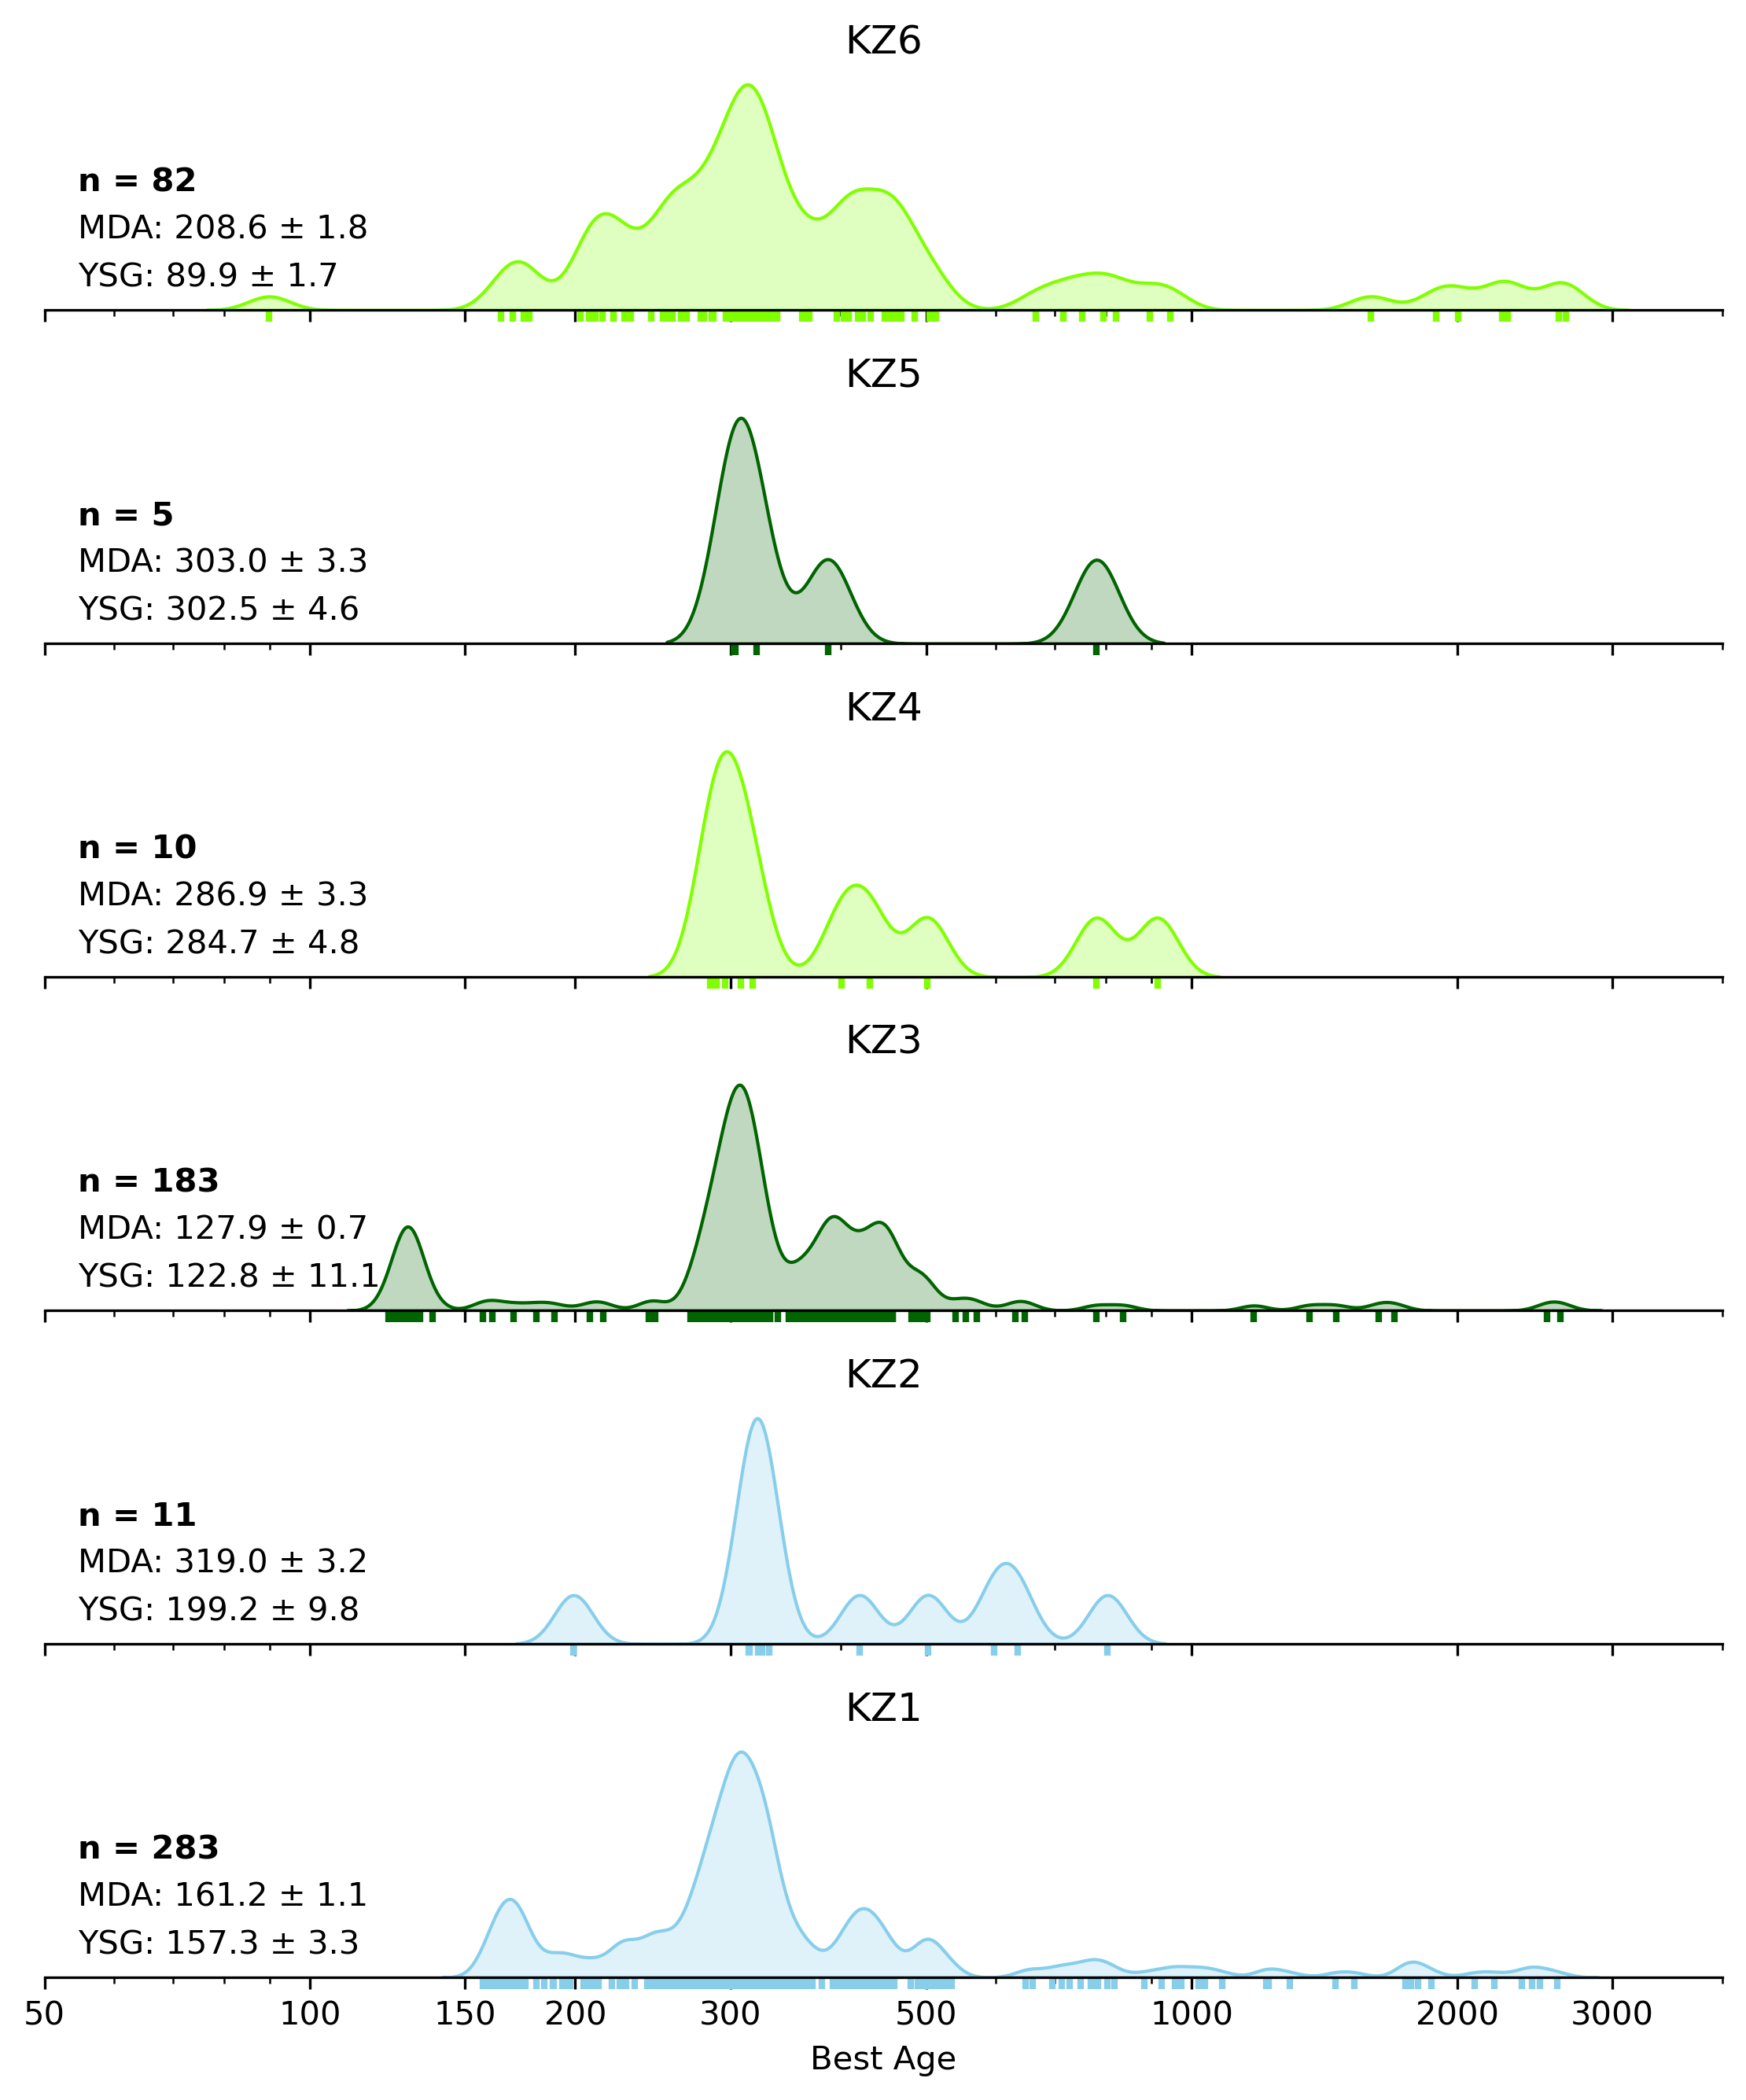

In [124]:
ticks = [50,100,150,200,300,500,1000,2000,3000]

# Plot KZ
plot_fault_block(kz_samples,save=True,filename='kz.pdf',method=None,bw_adjust=0.2,ticks=ticks)

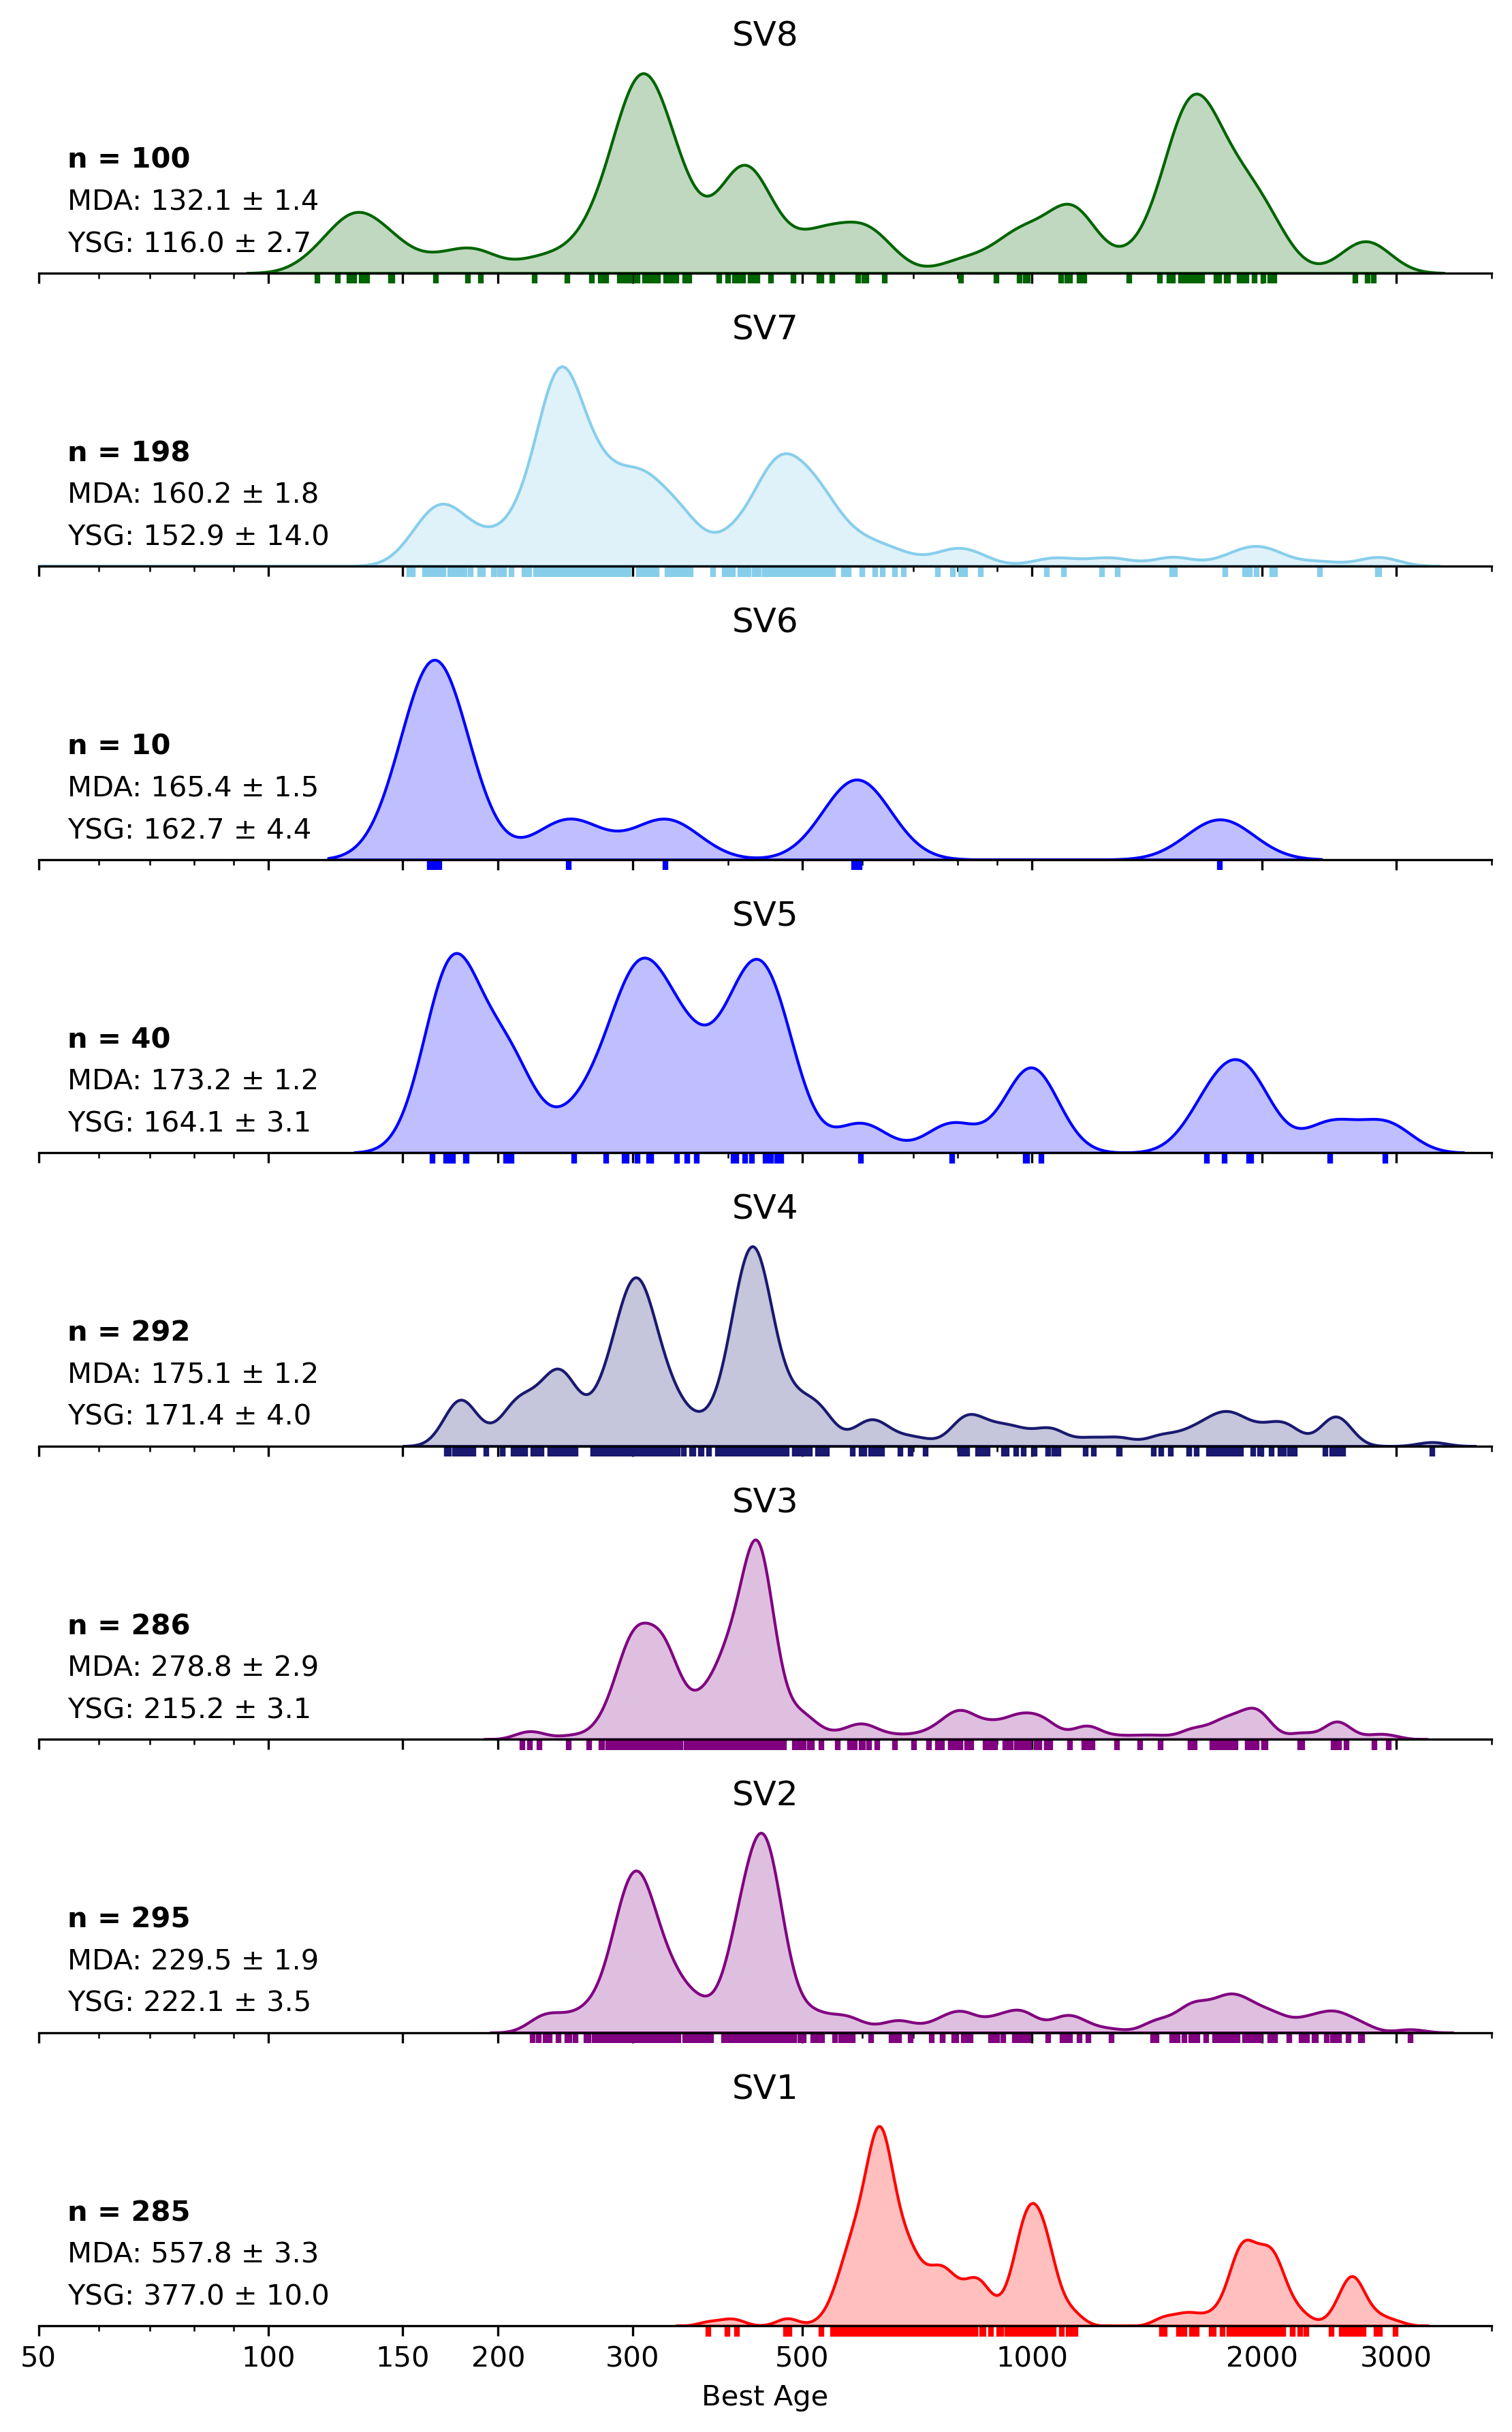

In [125]:
# Plot SV
plot_fault_block(sv_samples,save=True,filename='sv.pdf',method=None,bw_adjust=0.2,ticks=ticks)

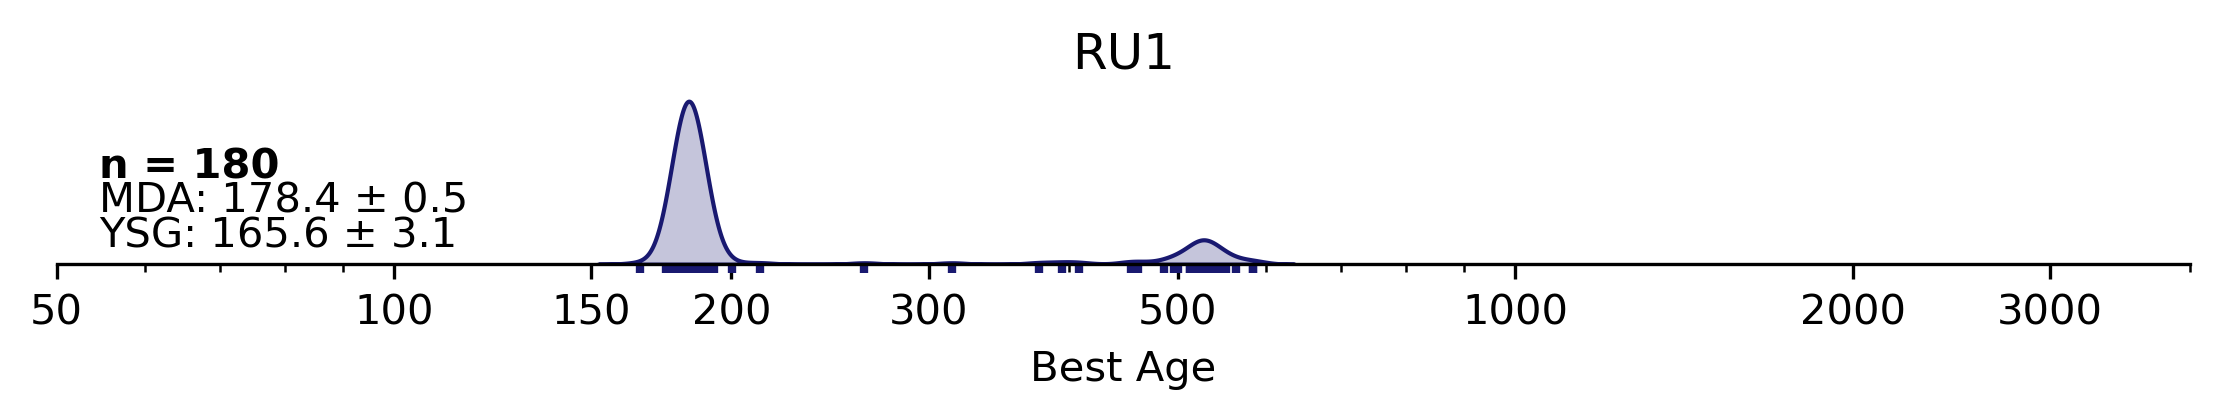

In [126]:
# Plot RU
ru = [smp for smp in samples if 'RU' in smp.name]

for smp in ru:
    age_errors = pd.concat([smp.bestage,smp.besterror],axis=1).dropna(how='any')    
    ages_sorted = age_errors.sort_values(by=['Best Age'],ignore_index=True)
    smp.ysg = ages_sorted.iloc[0,0]
    smp.ysg_err = ages_sorted.iloc[0,1]

plot_fault_block(ru,save=True,filename='ru.pdf',method=None,bw_adjust=0.2,ticks=ticks)